## Author:

Github : https://github.com/cryptokoryo  
Twitter: https://twitter.com/CryptoKoryo 

Copyright 2023 @CryptoKoryo  
MIT License

# Description

The code below allows you to get the list of the most followed Twitter accounts based on one account's followings.

Practical examples: 

https://twitter.com/CryptoKoryo/status/1669384756134281220?s=20  

https://twitter.com/CryptoKoryo/status/1669566921958621184?s=20

In [1]:
import os
import requests
import time

import pandas as pd 

from collections import Counter

In [2]:
# The Twitter API is not free. To get your keys, check:
# https://developer.twitter.com/en/docs/twitter-api


headers = {
    'Authorization': f'Bearer AAAAAAAAAAAAAAAAAAAAAKMeTQEAAAAA....', # Replace by your own key
}

In [3]:
# To find the Twitter ID for a given username use the following website:
# https://www.codeofaninja.com/tools/find-twitter-id/

# VitalikButerin: 295218901                
# Edgy: '1480297433020215297'
# Tree_of_Alpha:1456327895866314753'


# Replace by your favorite account's id
USER_ID = '1456327895866314753' 


MAX_RESULTS = 1000 # By default, Twitter retrieves 100 followings. 1000 is the max value.

In [5]:
def get_followings(user_id):
    """
     Function to retrieve followings for one user
     Input: Twitter User ID
     Output: List of followings
    """
    url = f'https://api.twitter.com/2/users/{user_id}/following?max_results={MAX_RESULTS}'
    response = requests.get(url, headers=headers)
    return response.json().get('data', [])
    

# 
def compute_following_stats(followings):
    """
     Function to retrieve all followings and count occurrences
     Input: List of USER_ID followings
     Output: 
         username_id_dict
         username_cmt_dict
         accounts_followed_by_user_id
    """
    username_id_dict = {}
    username_cmt_dict = Counter()
    accounts_followed_by_user_id = []

    
    # First we go over all the followings of USER_ID to store them and initialize thee count.
    for following in followings:
        print(f"{following['username']} - {following['name']} - {following['id']}")
        # We add any new id to the dictionary with its associated username
        username_id_dict[following['id']] = following['username']
        # Firs encounter of an account sets the number of occurences to 1.
        username_cmt_dict[following['id']] = 1
        # We add the accounts followed by the user to a list
        # This allows us to filter them out later and discover new popular accounts to follow
        accounts_followed_by_user_id.append(following['username'])

    # Then we go over each of the follwoings and update the occurences and accounts.
    for following in followings:
        twitter_id = following['id']
        print(f"Checking {username_id_dict[twitter_id]} followings.")

        followings = get_followings(twitter_id)

        if followings:
            for following in followings:
                username_id_dict[following['id']] = following['username']
                username_cmt_dict[following['id']] += 1
        else:
            print(f"Not authorized to see {username_id_dict[twitter_id]} followings.")

        # To not get 'get 'Too Many requests' error, we let it breath a bit.
        if len(accounts_followed_by_user_id) % 5 == 0:
            time.sleep(3)

    return username_id_dict, username_cmt_dict, accounts_followed_by_user_id



In [5]:
username_id_dict, username_cmt_dict, accounts_followed_by_user_id = compute_following_stats(get_followings(USER_ID))


_TreeNFT - TreeNFTs - 1640756492025360385
Yogita_Khatri5 - Yogita Khatri - 2399062758
donnelly_brent - ʎllǝuuop ʇuǝɹq - 2567843105
GiveDirectly - GiveDirectly💸 - 367813132
ado1024imokenp - Ado - 2929136138
Aimer_and_staff - Aimer&staff - 213970510
HiguchiAi - ヒグチアイ - 74434545
ekataCT - Ekata - 1375898544897425415
ReetikaTrades - Reetika - 3405743353
News_Of_Alpha - Tree News - 1282727055604486148
willoptions - will.js - 991401872173875201
NeetNort - N² - 1442695460502790145
SummersThings - Summers - 1471998857894666245
CryptoEthan - Ethan - 1361039118
Crypto_Noddy - CryptoNoddy - 1315047788833579008
binance - Binance - 877807935493033984
CL207 - CL - 1073132650309726208
cmsholdings - Canada Makes Smokescreen - 1196542741871771648
coffeebreak_YT - Coffeezilla - 915613265748795394
SalsaTekila - SalsaTekila - 1566114613
Snowden - Edward Snowden - 2916305152
dystopiabreaker - ⚡️🌙 - 1429011571833937921
saliencexbt - salience - 1595447869586083841
gabrielhaines - Gabriel Haines.eth - 3159122

In [6]:
# Create DataFrames from dictionaries
df_username_id = pd.DataFrame(list(username_id_dict.items()), columns=['id', 'username'])
df_id_cmt = pd.DataFrame(list(username_cmt_dict.items()), columns=['id', 'occurrences'])

# Merge DataFrames based on 'id' column
df = pd.merge(df_username_id, df_id_cmt, on='id')

# Sort the DataFrame by 'occurrences' in descending order
df = df.sort_values('occurrences', ascending=False).reset_index(drop=True)

In [7]:
df[['username','occurrences']].head(50)

,username,occurrences
0,Tree_of_Alpha,37
1,News_Of_Alpha,31
2,GCRClassic,31
3,tier10k,27
4,zachxbt,27
5,Awawat_Trades,26
6,HsakaTrades,26
7,ArkhamIntel,25
8,cz_binance,25
9,saliencexbt,24


In [8]:
# Search the most followed accounts that are not allowed by the master account it self
# This allows to discover new accounts

df.loc[~df.username.isin(accounts_followed_by_user_id),['username','occurrences']].head(30)

,username,occurrences
0,Tree_of_Alpha,37
2,GCRClassic,31
7,ArkhamIntel,25
13,elonmusk,20
15,conzimp,20
16,Galois_Capital,20
17,Pentosh1,20
18,justinsuntron,20
19,thiccythot_,20
20,EvgenyGaevoy,20


In [9]:
# Search for a specific username

username = 'balajis'
df[df.username==username]

,id,username,occurrences
264,2178012643,balajis,11


<AxesSubplot:>

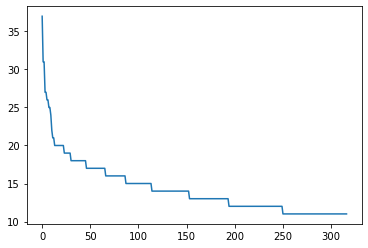

In [10]:
%matplotlib inline
df[df.occurrences>10].occurrences.plot()